In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import spacy
from gensim.models import Word2Vec
from sklearn.metrics import pairwise_distances
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sambh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sambh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('C://Users//sambh//Downloads//handm.csv')

In [3]:
df.head()

,Unnamed: 0,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,details,materials
0,0,834333001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.08343330...,49.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes with open lacing at front. Canvas ...,COMPOSITION\nSole:Thermoplastic rubber 100%\nU...
1,1,1258600003,Pile-Lined Slippers,H&M,https://www2.hm.com/en_us/productpage.12586000...,24.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_slippers,Slippers in napped fabric. Decorative seam at ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
2,2,1036812001,Derby Shoes,H&M,https://www2.hm.com/en_us/productpage.10368120...,56.99,Available,False,Black,True,272628,Charcoal,False,men_shoes_dressed,Derby shoes in soft faux suede with open lacin...,COMPOSITION\nLining and insole:Cotton 100%\nUp...
3,3,1112924002,Fleece-lined Slippers,H&M,https://www2.hm.com/en_us/productpage.11129240...,29.99,Available,False,Dark blue,True,393B47,Bright blue|Cobalt blue|Dark blue|Indigo|Navy ...,False,men_shoes_slippers,Slippers in woven fabric with a moccasin seam ...,COMPOSITION\nLining:Polyester 100%\nUpper:Poly...
4,4,1119476020,Sneakers,H&M,https://www2.hm.com/en_us/productpage.11194760...,29.99,Available,False,White,True,FFFFFF,NaN,False,men_shoes_sneakers,"Sneakers with a padded upper edge and tongue, ...",COMPOSITION\nLining:Polyester 100%\nUpper:Poly...


In [4]:
df.tail()

,Unnamed: 0,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,details,materials
9672,9672,1199187014,Slim Straight High Jeans,H&M,https://www2.hm.com/en_us/productpage.11991870...,34.99,Available,False,Beige,True,BBAB92,Ecru|Taupe|Wheat,False,ladies_jeans_straight,"Straight-fit, 5-pocket jeans in cotton denim w...","COMPOSITION\nShell:Cotton 99%, Spandex 1%\nPoc..."
9673,9673,1198343002,Bootcut High Jeans,H&M,https://www2.hm.com/en_us/productpage.11983430...,39.99,Available,False,Light denim blue,True,79829D,Blue gray|Bright blue|Pastel blue|Royal blue,False,ladies_jeans_bootcut,"5-pocket, bootcut jeans in cotton denim with g...","COMPOSITION\nShell:Cotton 99%, Spandex 1%\nPad..."
9674,9674,1232588003,Lace Push-up Bra,H&M,https://www2.hm.com/en_us/productpage.12325880...,17.99,Available,False,Powder pink,True,CCC2C2,Coral|Dusty pink|Light pink|Salmon,False,ladies_lingerie_bras_padded,Push-up bra in lace. Adjustable shoulder strap...,"COMPOSITION\nFront:Polyamide 88%, Spandex 12%\..."
9675,9675,1208310002,2-pack Padded Soft-cup Cotton Bras,H&M,https://www2.hm.com/en_us/productpage.12083100...,24.99,Available,False,Beige/black,True,BEA894,Ecru|Taupe|Wheat,False,ladies_lingerie_bras_multipack,Soft-cup bras in cotton jersey. Adjustable sho...,"COMPOSITION\nShell:Cotton 95%, Spandex 5%\nLin..."
9676,9676,1227825002,Padded Balconette Bikini Top,H&M,https://www2.hm.com/en_us/productpage.12278250...,19.99,Available,False,Brown,True,745A43,NaN,False,ladies_swimwear_bikinisets_tops,"Lined balconette bikini top. Detachable, adjus...","COMPOSITION\nShell:Polyester 93%, Spandex 7%\n..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colorName    9677 non-null   object 
 9   isOnline     9677 non-null   bool   
 10  colors       9677 non-null   object 
 11  colorShades  6511 non-null   object 
 12  newArrival   9677 non-null   bool   
 13  mainCatCode  9677 non-null   object 
 14  details      9676 non-null   object 
 15  materials    9518 non-null   object 
dtypes: bool(3), float64(1), int64(2), object(10)
memory usage: 1011.3+ KB


In [6]:
df.describe()

,Unnamed: 0,productId,price
count,9677.000000,9.677000e+03,9677.000000
mean,4838.000000,1.188702e+09,34.215088
std,2793.653611,1.206040e+08,28.262665
min,0.000000,1.077270e+08,3.990000
25%,2419.000000,1.198945e+09,18.990000
50%,4838.000000,1.230524e+09,29.990000
75%,7257.000000,1.244770e+09,39.990000
max,9676.000000,1.280785e+09,469.000000


# Filter out rows with missing materials

In [7]:
df_material = df[df['materials'].notna()].copy() 

# Text cleaning function

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b(?:lining|shell|coating|upper|part|main|composition|and|with)\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning

In [9]:
df_material['clean_materials'] = df_material['materials'].apply(clean_text)


# WORDCLOUD

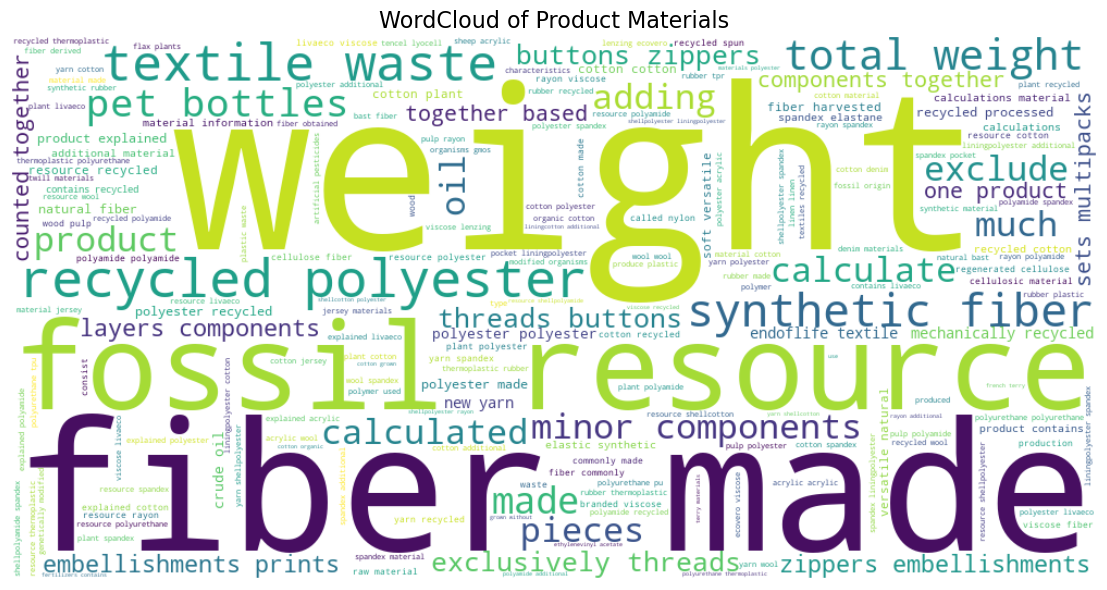

In [10]:
all_words = ' '.join(df_material['clean_materials']).split()
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Product Materials', fontsize=16)
plt.tight_layout()
plt.show()

# Cluster wise wordcloud

# UNIGRAM BARPLOT

C:\Users\sambh\AppData\Local\Temp\ipykernel_8708\3346236559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


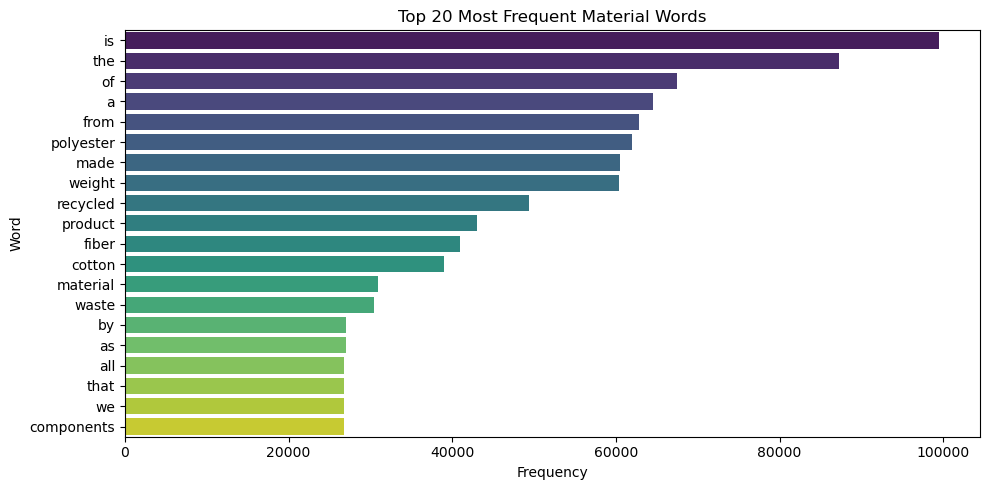

In [11]:
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Frequent Material Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# BIGRAM ANALYSIS

C:\Users\sambh\AppData\Local\Temp\ipykernel_8708\4096385079.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='coolwarm')


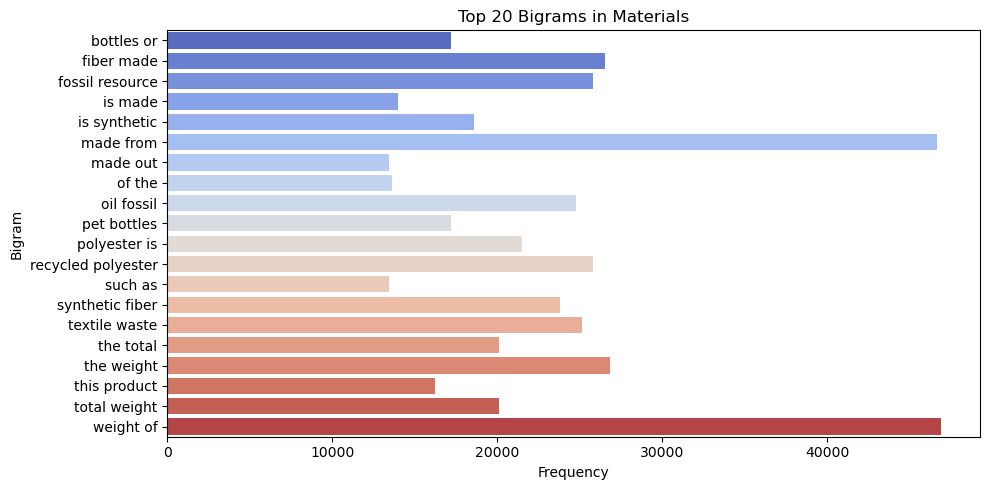

In [12]:
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_ngram = vectorizer_ngram.fit_transform(df_material['clean_materials'])
ngrams = vectorizer_ngram.get_feature_names_out()
counts = X_ngram.toarray().sum(axis=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=ngrams, palette='coolwarm')
plt.title('Top 20 Bigrams in Materials')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


# Dominant Material Analysis

C:\Users\sambh\AppData\Local\Temp\ipykernel_8708\2031443572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_materials.values, y=top_materials.index, palette='Set2')


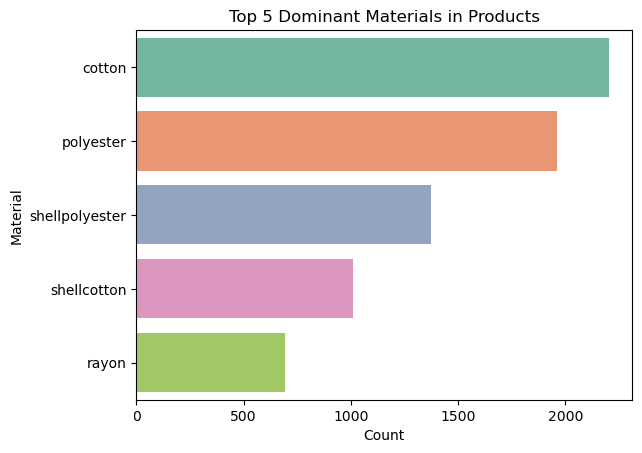

In [13]:
dominant_materials = df_material['clean_materials'].apply(lambda x: x.split()[0])  # crude approximation
top_materials = dominant_materials.value_counts().head(5)
sns.barplot(x=top_materials.values, y=top_materials.index, palette='Set2')
plt.title("Top 5 Dominant Materials in Products")
plt.xlabel("Count")
plt.ylabel("Material")
plt.show()


# TF-IDF + PCA Visualization

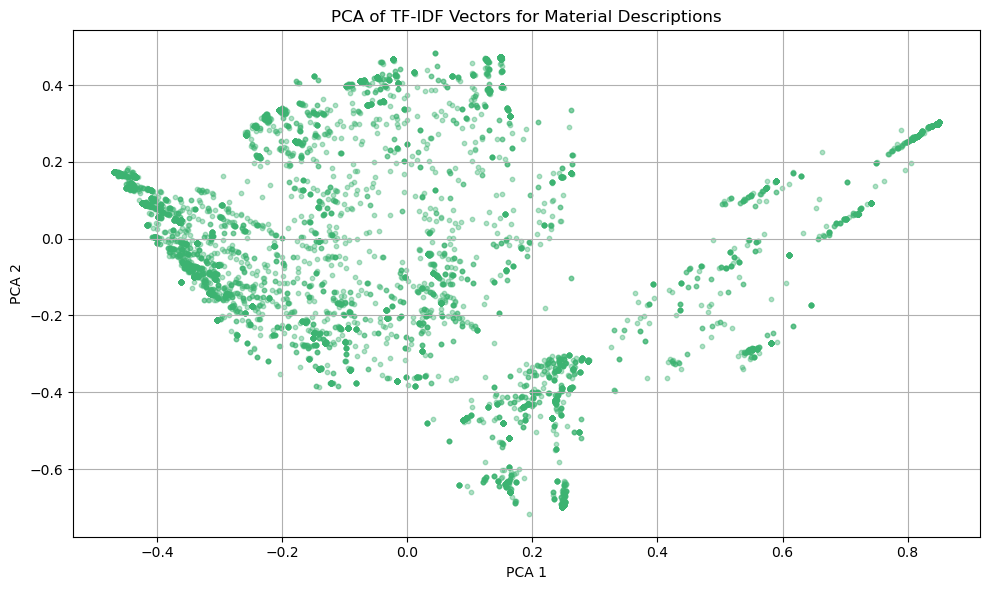

In [14]:
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df_material['clean_materials'])
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4, s=10, color='mediumseagreen')
plt.title('PCA of TF-IDF Vectors for Material Descriptions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# K MEANS CLUSTERING

In [15]:
kmeans = KMeans(n_clusters= 3, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)
df_material['cluster'] = clusters

# t-SNE Visualization with KMeans Clusters

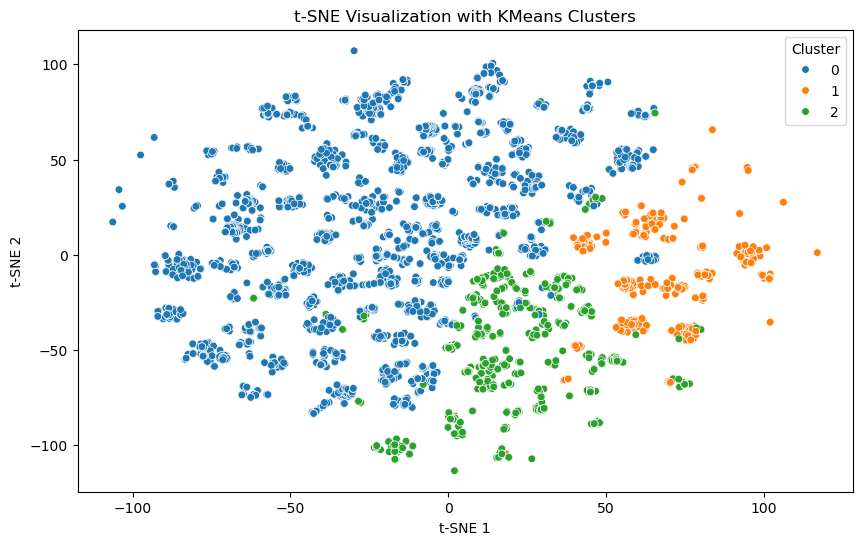

In [16]:
X_array = X_tfidf.toarray()  # Convert to dense format if necessary
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_array)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_material['cluster'], palette='tab10', s=30)
plt.title("t-SNE Visualization with KMeans Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()


# Silhoute score to optimise K means clusters

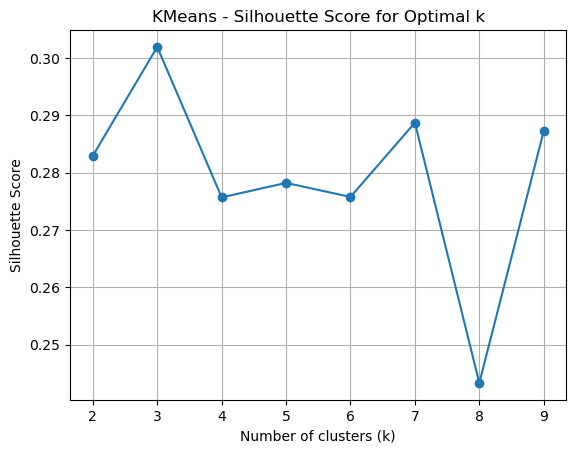

In [17]:
silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, preds)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('KMeans - Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

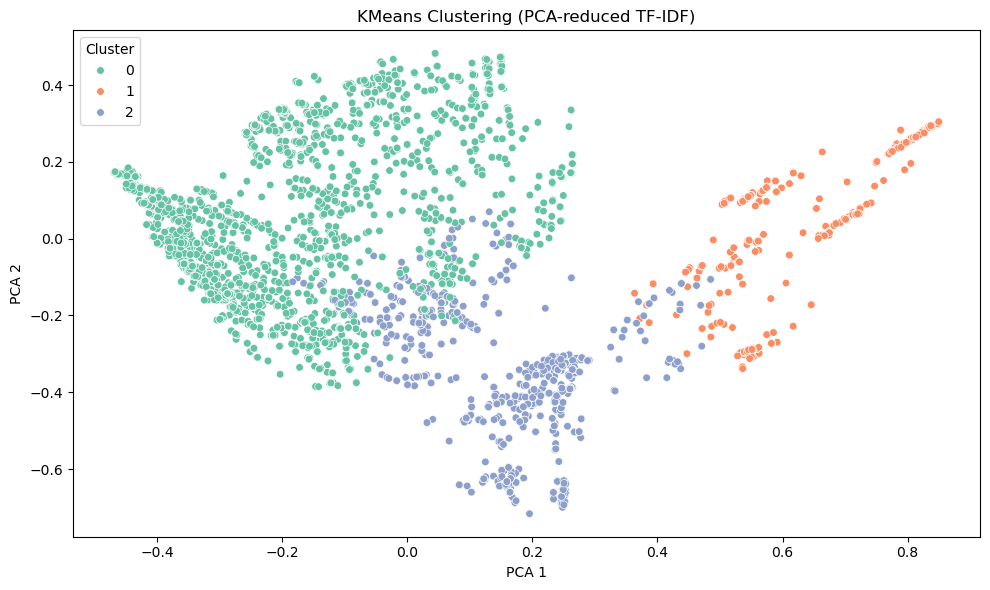

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=30)
plt.title('KMeans Clustering (PCA-reduced TF-IDF)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

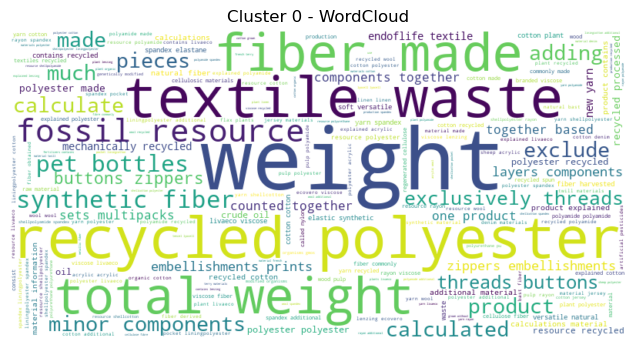

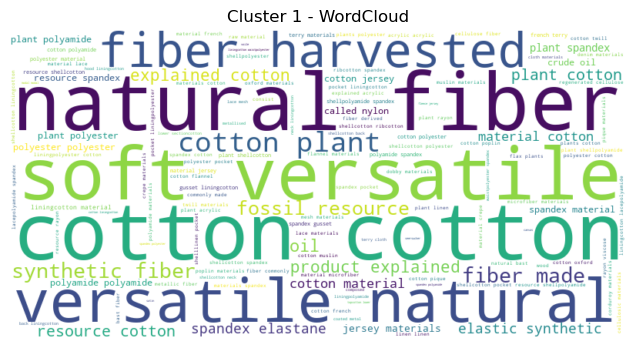

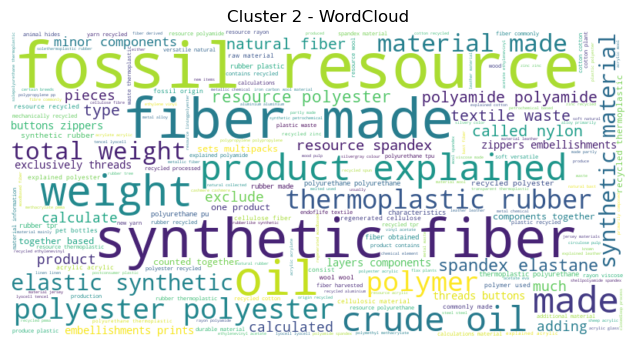

In [19]:
for i in range(kmeans.n_clusters):
    cluster_text = ' '.join(df_material[df_material['cluster'] == i]['clean_materials'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i} - WordCloud')
    plt.show()


# PIE CHART OF MATERIAL TYPES

In [20]:
def classify_material(text):
    if not isinstance(text, str):
        return "Other"
    natural = ["cotton", "linen", "leather", "wool", "silk", "hemp"]
    synthetic = ["polyester", "elastane", "polyamide", "acrylic", "viscose", "polyurethane"]
    for word in natural:
        if word in text.lower():
            return "Natural"
    for word in synthetic:
        if word in text.lower():
            return "Synthetic"
    return "Other"

df_material['material_type'] = df_material['clean_materials'].apply(classify_material)


In [21]:
query = "cotton polyester"
query_vec = tfidf.transform([query])
similarities = cosine_similarity(query_vec, X_tfidf).flatten()
top_indices = similarities.argsort()[37:53][::-1]
print("\nTop 5 Most Similar Material Descriptions to 'cotton polyester':\n")
print(df_material.iloc[top_indices][['materials', 'material_type']])


Top 5 Most Similar Material Descriptions to 'cotton polyester':

                                              materials material_type
6098  COMPOSITION\nPolyurethane 100% , MATERIALS IN ...     Synthetic
6187  COMPOSITION\nLyocell 95%, Spandex 5% , ADDITIO...     Synthetic
6173  COMPOSITION\nRayon 50%, Acrylic 50% , ADDITION...     Synthetic
6171  COMPOSITION\nRayon 100% , ADDITIONAL MATERIAL ...     Synthetic
6168  COMPOSITION\nAcrylic 100% , MATERIALS IN THIS ...     Synthetic
6161  COMPOSITION\nLining:Polyurethane 100%\nUpper:P...     Synthetic
6156  COMPOSITION\nRayon 50%, Acrylic 50% , ADDITION...     Synthetic
3326  COMPOSITION\nRayon 70%, Polyamide 30% , ADDITI...     Synthetic
6150  COMPOSITION\nShell:Polyamide 92%, Spandex 8%\n...     Synthetic
6138  COMPOSITION\nShell:Polyamide 81%, Spandex 19%\...     Synthetic
6127  COMPOSITION\nPolyurethane 100% , MATERIALS IN ...     Synthetic
6125  COMPOSITION\nBirch 70%, Aluminium 17%, Polypro...         Other
6124  COMPOSITION\nBirch

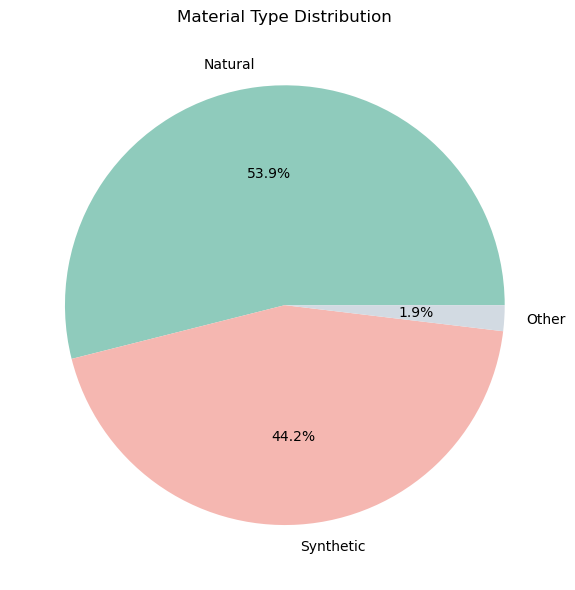

In [22]:
plt.figure(figsize=(6, 6))
df_material['material_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#8fcbbc','#f5b7b1','#d2dae2'])
plt.title('Material Type Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


# ADVANCED: Word2Vec Semantic Clustering

In [23]:
corpus_tokens = [text.split() for text in df_material['clean_materials']]
word2vec_model = Word2Vec(sentences=corpus_tokens, vector_size=100, window=5, min_count=2, workers=4, seed=42)
word_vectors = word2vec_model.wv

In [24]:
words = list(word_vectors.index_to_key)
word_vec_matrix = np.array([word_vectors[word] for word in words])
word_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(word_vec_matrix)

C:\Users\sambh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


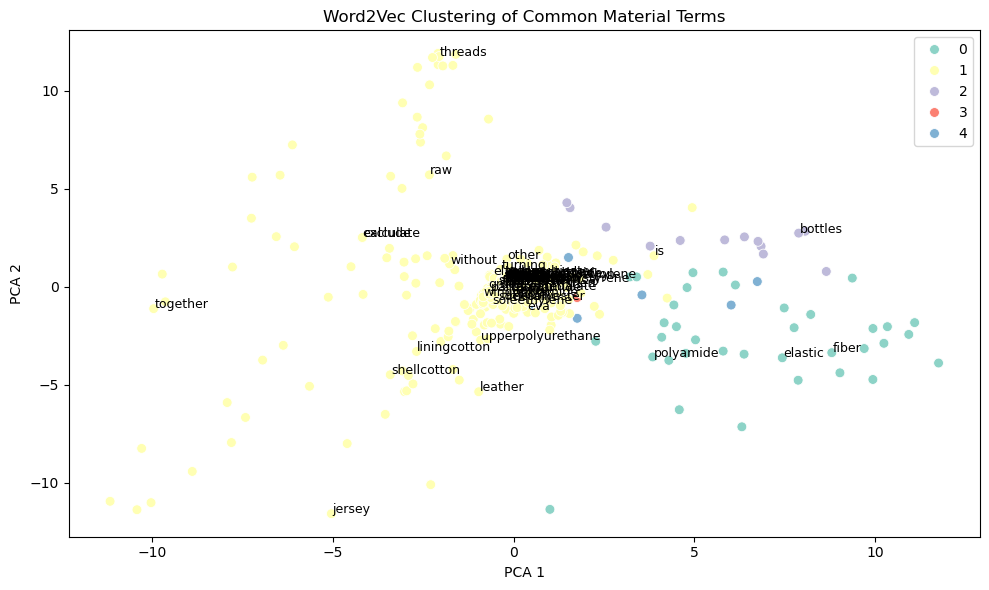

In [25]:
plt.figure(figsize=(10, 6))
pca_words = PCA(n_components=2).fit_transform(word_vec_matrix)
sns.scatterplot(x=pca_words[:, 0], y=pca_words[:, 1], hue=word_clusters, palette='Set3', s=50, legend='full')
for i, word in enumerate(words):
    if i % 10 == 0:
        plt.text(pca_words[i, 0]+0.02, pca_words[i, 1]+0.02, word, fontsize=9)
plt.title("Word2Vec Clustering of Common Material Terms")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()